<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/Sequential/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

#Data Split

In [3]:
X = data_values[:,0:8]
y = data_values[:,8]

#Houldot

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
# define model base
def model_base():
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation = 'relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  #Compile
  model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
  return model

In [6]:
"""
@Description: Implement a matrix of confusion of a binary model
@Values:
          validation (Series) a series with values of test
          prediction (Series) a series with values of prediction
          title (String)  title
          target (String)
          not_target (String)
"""

def matrix_confusion(validation, prediction, title, target, not_target):
  matrix = metrics.confusion_matrix(validation, prediction)
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))
  sns.heatmap(matrix, annot=True, ax = ax,cmap=plt.cm.Blues,fmt='g',annot_kws={"size": 13})
  ax.set_title(title,size=13)

  ax.xaxis.set_ticklabels([not_target,target])
  ax.yaxis.set_ticklabels([not_target,target], va="center")

  ax.tick_params(labelsize = 13)

  return matrix

In [7]:
"""
@Description: This method show some metrics for algorithms of classification binary
@Values:
          - validation (Series) a series with values of test
          - prediction (Series) a series with values of prediction
          - name_target (Serie) 
          - label: target
          - matrix (ndarray)
"""

def metrics_clasification_binary(validation, prediction, name_target,label, matrix):
  print('Accuracy', metrics.accuracy_score(validation, prediction))
  print('Kappa',  metrics.cohen_kappa_score(validation, prediction))
  print('----------------------------------------------------------- \n')

  print(f'Metrics of {name_target}')
  print('Precision', metrics.precision_score(validation, prediction, label, average='macro'))
  print("Recall: ",  metrics.recall_score(validation, prediction, label, average='macro'))
  
  VN = matrix[0,0]
  FP = matrix[0,1]
  specificity = VN/(VN+FP)

  print('Specificity', specificity)
  print("F1-score      : ", metrics.f1_score(validation, prediction, label, average='macro'))


In [8]:

"""
@Description: This method shows the balance between class
@Values:
        - data (DataFrame)
        - tag (string)
        - target (string)
        - not_target (string)
        - title (string)

"""
def balance_data(data,tag,target,not_target,title):
  fig, ax = plt.subplots(figsize = (6,4))
  fig.suptitle(f'Count Plot {title}', fontsize = 15)
  sns.countplot(x = tag, data = data, ax = ax)
  ax.set_ylabel(f'{tag}(ni)', size = 12)
  data_target = data[tag].value_counts()
  len_data = data.shape[0]
  pe = '{0:.2f}'.format(data_target[1]/len_data)
  ps = '{0:.2f}'.format(data_target[0]/len_data)
  ax.set_xticklabels([f'{not_target} \n {ps}', f'{target} \n {pe}'], size = 10)

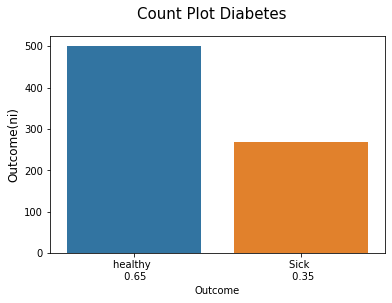

In [9]:
# Data balance
balance_data(data, 'Outcome', 'Sick','healthy', 'Diabetes')

- Hay un desbalance

In [10]:
model = model_base()
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150, batch_size = 16, verbose = 0)

In [11]:
# Problema de optimización
loss, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.3f' % (accuracy))
print('Loss: %.3f' % (loss))

18/18 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7726
Accuracy: 0.773
Loss: 0.491


In [12]:
# Problema de generalizaciòn
loss, accuracy = model.evaluate(X_test, y_test)
print('Val_accuracy: %.3f' % (accuracy))
print('Val_loss %.3f' % (loss))

6/6 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7604
Val_accuracy: 0.760
Val_loss 0.551


- Modelo presenta un ligero overfitting

In [13]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy and Loss

In [14]:
"""
  [description]
    - Visualiza una comparativa entre dos series de valores de las métricas de redes neuronales (accuracy vs val_accuracy)(loss vs val_loss)
  [values]
    - data
    - data_value            : serie correspondiente a los datos obtenidos durante el entrenamiento
    - data_value_validation : serie correspondiente a los datos obtenidos durante la validación
    - tag                   : una cadena que representa una etiqueta del eje y
    - title                 : titulo del grafico
"""

def plot_valuevalidation_valueoptimation(data, data_value, data_value_validation, tag, title):
  fig, ax = plt.subplots(figsize = (8,4))
  fig.suptitle(title, fontsize = 15)
  ax.plot(history.history[data_value])
  ax.plot(history.history[data_value_validation])
  ax.set_xlabel('Epochs', size = 12)
  ax.set_ylabel(tag, size = 12)
  ax.legend(['Train', 'Test'], loc='upper left', fontsize = 12)
  ax.tick_params(labelsize = 12)

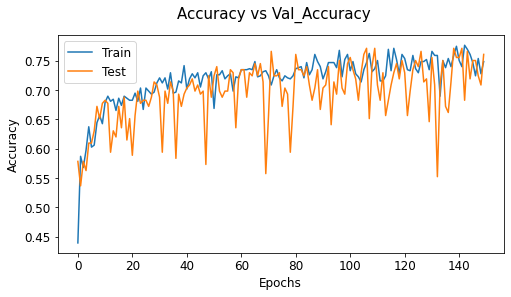

In [15]:
plot_valuevalidation_valueoptimation(history, 'accuracy', 'val_accuracy', 'Accuracy', 'Accuracy vs Val_Accuracy')

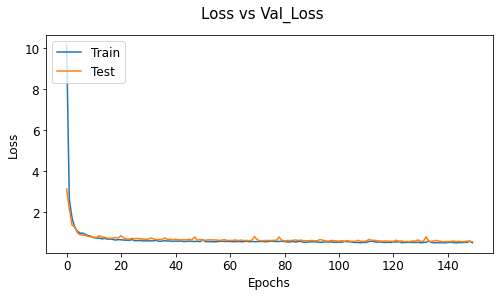

In [16]:
plot_valuevalidation_valueoptimation(history, 'loss', 'val_loss', 'Loss', 'Loss vs Val_Loss')

#Predictions

In [20]:
y_pred = (model.predict(X_test)>0.5).astype('int')
y_pred = y_pred.reshape((y_pred.shape[0]))

In [22]:
for i in range(15):
  print('%s --> %d (real %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[4.0, 136.0, 70.0, 0.0, 0.0, 31.2, 1.182, 22.0] --> 0 (real 1)
[0.0, 107.0, 60.0, 25.0, 0.0, 26.4, 0.133, 23.0] --> 0 (real 0)
[5.0, 123.0, 74.0, 40.0, 77.0, 34.1, 0.26899999999999996, 28.0] --> 0 (real 0)
[8.0, 126.0, 74.0, 38.0, 75.0, 25.9, 0.162, 39.0] --> 0 (real 0)
[4.0, 103.0, 60.0, 33.0, 192.0, 24.0, 0.966, 33.0] --> 0 (real 0)
[0.0, 84.0, 82.0, 31.0, 125.0, 38.2, 0.233, 23.0] --> 0 (real 0)
[6.0, 147.0, 80.0, 0.0, 0.0, 29.5, 0.17800000000000002, 50.0] --> 1 (real 1)
[2.0, 112.0, 66.0, 22.0, 0.0, 25.0, 0.307, 24.0] --> 0 (real 0)
[3.0, 80.0, 0.0, 0.0, 0.0, 0.0, 0.174, 22.0] --> 1 (real 0)
[4.0, 97.0, 60.0, 23.0, 0.0, 28.2, 0.44299999999999995, 22.0] --> 0 (real 0)
[4.0, 145.0, 82.0, 18.0, 0.0, 32.5, 0.235, 70.0] --> 0 (real 1)
[8.0, 176.0, 90.0, 34.0, 300.0, 33.7, 0.467, 58.0] --> 1 (real 1)
[0.0, 91.0, 80.0, 0.0, 0.0, 32.4, 0.601, 27.0] --> 0 (real 0)
[4.0, 148.0, 60.0, 27.0, 318.0, 30.9, 0.15, 29.0] --> 1 (real 1)
[1.0, 95.0, 66.0, 13.0, 38.0, 19.6, 0.33399999999999996, 25.0] 

## Confusion Matrix

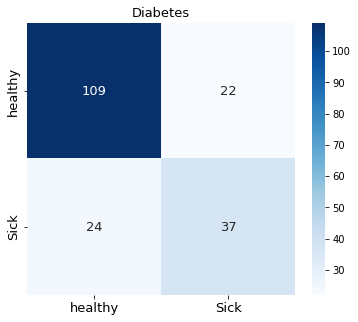

In [25]:
matrix = matrix_confusion(y_test, y_pred, 'Diabetes' , 'Sick', 'healthy')

## Metrics

In [26]:
metrics_clasification_binary(y_test, y_pred, 'Diabetes',[1], matrix)

Accuracy 0.7604166666666666
Kappa 0.44249463451584403
----------------------------------------------------------- 

Metrics of Diabetes
Precision 0.6271186440677966
Recall:  0.6065573770491803
Specificity 0.8320610687022901
F1-score      :  0.6166666666666666


# Cross Validation

In [27]:
#StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores_loss_train = []
cvscores_loss_test = []
cvscores_accuracy_train = []
cvscores_accuracy_test = []

for train, test in kfold.split(X,y):
  model = model_base()
  model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=150, batch_size = 16, verbose = 0)
  loss_train, accuracy_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_accuracy_train.append(accuracy_train)
  loss_test, accuracy_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_accuracy_test.append(accuracy_test)
  print('======================================================================')
  print('loss: %.3f accuracy: %.3f%% val_loss: %.3f val_accuracy: %.3f%%' % (loss_train, accuracy_train*100, loss_test, accuracy_test*100))

print('==============================Train Accuracy Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy_train), np.std(cvscores_accuracy_train)))
print('==============================Test Accuracy Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_accuracy_test), np.std(cvscores_accuracy_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

loss: 0.521 accuracy: 75.253% val_loss: 0.534 val_accuracy: 75.325%
loss: 0.525 accuracy: 73.661% val_loss: 0.539 val_accuracy: 76.623%
loss: 0.544 accuracy: 73.661% val_loss: 0.542 val_accuracy: 75.325%
loss: 0.698 accuracy: 61.939% val_loss: 0.711 val_accuracy: 63.636%
loss: 0.538 accuracy: 73.082% val_loss: 0.635 val_accuracy: 67.532%
loss: 0.556 accuracy: 72.648% val_loss: 0.730 val_accuracy: 63.636%
loss: 0.510 accuracy: 74.674% val_loss: 0.415 val_accuracy: 84.416%
loss: 0.578 accuracy: 68.452% val_loss: 0.521 val_accuracy: 71.429%
loss: 0.509 accuracy: 74.422% val_loss: 0.561 val_accuracy: 71.053%
loss: 0.470 accuracy: 78.035% val_loss: 0.509 val_accuracy: 77.632%
==============================Train Accuracy Total 10 pliegues==============================
0.73% (+/- 0.04%)
==============================Test Accuracy Total 10 pliegues==============================
0.73% (+/- 0.06%)
==============================Train Loss Total 10 pliegues==============================
0.55% (+/-

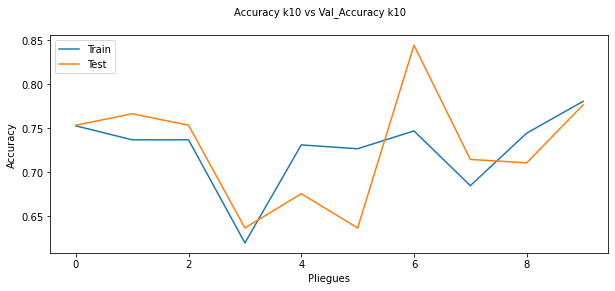

In [28]:
  fig, ax = plt.subplots(figsize = (10,4))
  fig.suptitle(f'Accuracy k{len(cvscores_accuracy_train)} vs Val_Accuracy k{len(cvscores_accuracy_test)}', fontsize = 10)
  ax.plot(cvscores_accuracy_train)
  ax.plot(cvscores_accuracy_test)
  ax.set_xlabel('Pliegues', size = 10)
  ax.set_ylabel('Accuracy', size = 10)
  ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
  ax.tick_params(labelsize = 10)

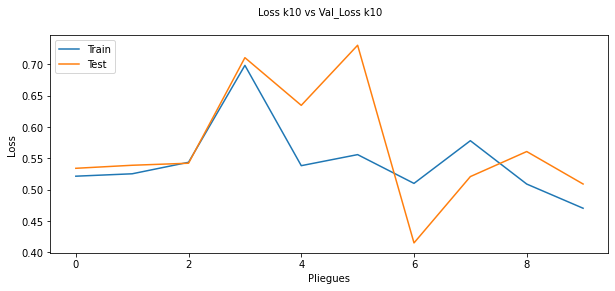

In [29]:
  fig, ax = plt.subplots(figsize = (10,4))
  fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
  ax.plot(cvscores_loss_train)
  ax.plot(cvscores_loss_test)
  ax.set_xlabel('Pliegues', size = 10)
  ax.set_ylabel('Loss', size = 10)
  ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
  ax.tick_params(labelsize = 10)